In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
POSITIONS = np.array(range(1, 21))

game_data = pd.read_csv('epl2020.csv')
print(game_data.columns)
game_data.head(10)

Index(['Unnamed: 0', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'teamId', 'ppda_cal', 'allowed_ppda',
       'matchtime', 'tot_points', 'round', 'tot_goal', 'tot_con', 'Referee.x',
       'HS.x', 'HST.x', 'HF.x', 'HC.x', 'HY.x', 'HR.x', 'AS.x', 'AST.x',
       'AF.x', 'AC.x', 'AY.x', 'AR.x', 'B365H.x', 'B365D.x', 'B365A.x',
       'HtrgPerc', 'AtrgPerc', 'matchDay'],
      dtype='object')


,Unnamed: 0,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
0,1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,...,9,2,2,0,1.14,10.00,19.00,0.466667,0.416667,Fri
1,2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,...,9,2,2,0,1.14,10.00,19.00,0.466667,0.416667,Fri
2,3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,...,13,1,2,0,12.00,6.50,1.22,0.600000,0.642857,Sat
3,4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,...,13,1,2,0,12.00,6.50,1.22,0.600000,0.642857,Sat
4,5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,...,19,4,1,0,1.95,3.60,3.60,0.230769,0.375000,Sat
5,6,a,0.855516,0.670022,0.855516,0.670022,5,7,3,0,...,11,2,1,0,1.90,3.40,4.00,0.272727,0.600000,Sat
6,7,h,0.909241,1.087520,0.909241,1.087520,0,9,3,0,...,12,7,0,0,2.62,3.20,2.75,0.400000,0.272727,Sat
7,8,h,0.871590,1.224600,0.871590,1.224600,5,5,0,0,...,14,2,1,1,3.00,3.25,2.37,0.333333,0.300000,Sat
8,9,a,1.224600,0.871590,1.224600,0.871590,5,5,0,0,...,14,2,1,1,3.00,3.25,2.37,0.333333,0.300000,Sat
9,10,a,1.598640,1.340990,1.598640,1.340990,6,4,1,1,...,19,4,1,0,1.95,3.60,3.60,0.230769,0.375000,Sat


* 실제 경기 데이터

In [3]:
# Get the list of teams
teams = game_data['teamId'].unique()

# Get the results for each team
team_results = []
for team in teams:
    # Get the data for that team
    team_data = game_data[game_data['teamId'] == team]
    
    wins = team_data['wins'].sum()
    draws = team_data['draws'].sum()
    losses = team_data['loses'].sum()
    scored = team_data['scored'].sum()
    conceded = team_data['missed'].sum()
    games = wins + draws + losses
    points = (3 * wins) + draws
    goal_difference = scored - conceded
    
    team_results.append([team, games, wins, draws, losses, scored, conceded, goal_difference, points])

league_table = pd.DataFrame(team_results, columns=['Team', 'P', 'W', 'D', 'L', 'F', 'A', 'GD', 'Points'])
league_table.sort_values(by=['Points', 'GD', 'F'], ascending=False, inplace=True, ignore_index=True)
league_table.set_index(POSITIONS, inplace=True)
league_table.head(20)

,Team,P,W,D,L,F,A,GD,Points
1,Liverpool,29,27,1,1,66,21,45,82
2,Man City,28,18,3,7,68,31,37,57
3,Leicester,29,16,5,8,58,28,30,53
4,Chelsea,29,14,6,9,51,39,12,48
5,Man Utd,29,12,9,8,44,30,14,45
6,Wolves,29,10,13,6,41,34,7,43
7,Sheffield United,28,11,10,7,30,25,5,43
8,Tottenham,29,11,8,10,47,40,7,41
9,Arsenal,28,9,13,6,40,36,4,40
10,Burnley,29,11,6,12,34,40,-6,39


* 기대값으로 테이블 만들기

In [4]:
# Get a rounded expected goals scored and conceded
game_data['xGround'] = game_data['xG'].apply(lambda x: round(x))
game_data['xGAround'] = game_data['xGA'].apply(lambda x: round(x))
game_data['xwin'] = game_data.apply(lambda x: 1 if x['xGround'] > x['xGAround'] else 0, axis=1)
game_data['xdraw'] = game_data.apply(lambda x: 1 if x['xGround'] == x['xGAround'] else 0, axis=1)
game_data['xloss'] = game_data.apply(lambda x: 1 if x['xGround'] < x['xGAround'] else 0, axis=1)

In [5]:
# Get the results for each team
x_team_results = []
for team in teams:
    # Get the data for that team
    team_data = game_data[game_data['teamId'] == team]
    
    wins = team_data['xwin'].sum()
    draws = team_data['xdraw'].sum()
    losses = team_data['xloss'].sum()
    scored = team_data['xGround'].sum()
    conceded = team_data['xGAround'].sum()
    games = wins + draws + losses
    points = (3 * wins) + draws
    goal_difference = scored - conceded
    
    x_team_results.append([team, games, wins, draws, losses, scored, conceded, goal_difference, points])

x_league_table = pd.DataFrame(x_team_results, columns=['Team', 'P', 'W', 'D', 'L', 'F', 'A', 'GD', 'Points'])
x_league_table.sort_values(by=['Points', 'GD', 'F'], ascending=False, inplace=True, ignore_index=True)
x_league_table.set_index(POSITIONS, inplace=True)
x_league_table.head(20)

,Team,P,W,D,L,F,A,GD,Points
1,Man City,28,21,6,1,72,27,45,69
2,Liverpool,29,20,8,1,61,28,33,68
3,Chelsea,29,17,8,4,54,30,24,59
4,Wolves,29,14,11,4,44,31,13,53
5,Man Utd,29,14,8,7,49,32,17,50
6,Leicester,29,13,9,7,47,38,9,48
7,Everton,29,11,10,8,44,38,6,43
8,Burnley,29,10,13,6,40,39,1,43
9,Southampton,29,11,9,9,42,46,-4,42
10,Sheffield United,28,10,10,8,39,37,2,40


In [6]:
# Get the results for each team
xp_team_results = []
for team in teams:
    # Get the data for that team
    team_data = game_data[game_data['teamId'] == team]
    
    xp = team_data['xpts'].sum()
    
    xp_team_results.append([team, xp])

xp_league_table = pd.DataFrame(xp_team_results, columns=['Team', 'Points'])
xp_league_table.sort_values(by=['Points'], ascending=False, inplace=True, ignore_index=True)
xp_league_table.set_index(POSITIONS, inplace=True)
xp_league_table.head(20)

,Team,Points
1,Man City,63.2076
2,Liverpool,59.8127
3,Chelsea,55.5476
4,Man Utd,52.1008
5,Wolves,49.2557
6,Leicester,47.6633
7,Everton,46.6459
8,Southampton,41.0947
9,Burnley,39.5687
10,Sheffield United,39.0611


* 팀 퍼포먼스

In [7]:
team_positions = []
for team in teams:
    current_pos = league_table[league_table['Team'] == team].index[0]
    xg_pos = x_league_table[x_league_table['Team'] == team].index[0]
    xp_pos = xp_league_table[xp_league_table['Team'] == team].index[0]
    overperforming = 'Yes' if current_pos < xg_pos else 'No'
    team_positions.append([team, current_pos, xg_pos, xp_pos, overperforming])

position_table = pd.DataFrame(team_positions, columns=['Team', 'Position', 'xG Position', 'xPts Position', 'Overperforming'])
position_table.sort_values(by=['Position'], ascending=True, inplace=True, ignore_index=True)
position_table.head(20)

,Team,Position,xG Position,xPts Position,Overperforming
0,Liverpool,1,2,2,Yes
1,Man City,2,1,1,No
2,Leicester,3,6,6,Yes
3,Chelsea,4,3,3,No
4,Man Utd,5,5,4,No
5,Wolves,6,4,5,No
6,Sheffield United,7,10,10,Yes
7,Tottenham,8,13,12,Yes
8,Arsenal,9,11,14,Yes
9,Burnley,10,8,9,No


* 최근 폼

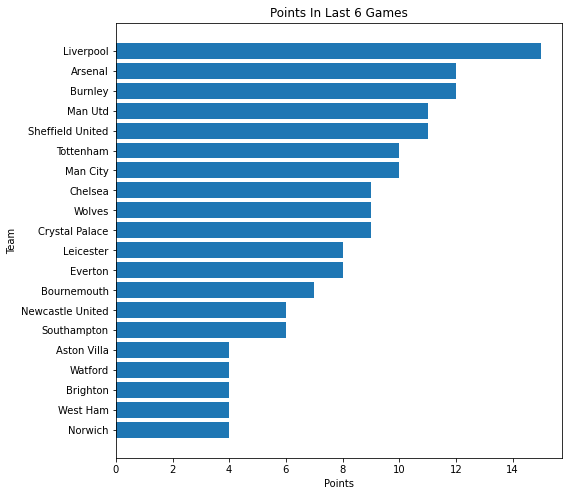

In [8]:
recent_form = []

for team in teams:
    # Get the data for that team
    team_data = game_data[game_data['teamId'] == team].tail(6)
    
    wins = team_data['wins'].sum()
    draws = team_data['draws'].sum()
    points = (3 * wins) + draws
    
    recent_form.append([team, points])

recent_form.sort(key=lambda x: x[1])

plt.figure(figsize = (8, 8))
plt.barh(range(20), [x[1] for x in recent_form])
plt.xlabel('Points')
plt.ylabel('Team')
plt.title('Points In Last 6 Games')
plt.yticks(range(20), [x[0] for x in recent_form])
plt.show()

* 만약 퍼포먼스를 유지했더라면?

In [9]:
team_points = []

# Add recent points per game to table
for team in teams:
    points_per_game = [x for x in recent_form if x[0] == team][0][1] / 6
    team_data = league_table[league_table['Team'] == team].iloc[0]
    games_to_play = 38 - team_data['P']
    new_points = int(team_data['Points'] + round(points_per_game * games_to_play))
    team_points.append([team, new_points])

predicted_table = pd.DataFrame(team_points, columns=['Team', 'Points'])
predicted_table.sort_values(by=['Points'], ascending=False, inplace=True, ignore_index=True)
predicted_table.set_index(POSITIONS, inplace=True)
predicted_table.head(20)

,Team,Points
1,Liverpool,104
2,Man City,74
3,Leicester,65
4,Chelsea,62
5,Sheffield United,61
6,Man Utd,61
7,Arsenal,60
8,Burnley,57
9,Wolves,57
10,Tottenham,56


In [10]:
# Get the list of teams
teams = game_data['teamId'].unique()

# Get the results for each team
team_results = []
for team in teams:
    # Get the data for that team
    team_data = game_data[game_data['teamId'] == team]
    
    wins = team_data['wins'].sum()
    draws = team_data['draws'].sum()
    losses = team_data['loses'].sum()
    scored = team_data['scored'].sum()
    conceded = team_data['missed'].sum()
    games = wins + draws + losses
    points = (3 * wins) + draws
    goal_difference = scored - conceded
    
    team_results.append([team, games, wins, draws, losses, scored, conceded, goal_difference, points])

league_table = pd.DataFrame(team_results, columns=['Team', 'P', 'W', 'D', 'L', 'F', 'A', 'GD', 'Points'])
league_table.sort_values(by=['Points', 'GD', 'F'], ascending=False, inplace=True, ignore_index=True)
league_table.set_index(POSITIONS, inplace=True)
league_table.head(20)

,Team,P,W,D,L,F,A,GD,Points
1,Liverpool,29,27,1,1,66,21,45,82
2,Man City,28,18,3,7,68,31,37,57
3,Leicester,29,16,5,8,58,28,30,53
4,Chelsea,29,14,6,9,51,39,12,48
5,Man Utd,29,12,9,8,44,30,14,45
6,Wolves,29,10,13,6,41,34,7,43
7,Sheffield United,28,11,10,7,30,25,5,43
8,Tottenham,29,11,8,10,47,40,7,41
9,Arsenal,28,9,13,6,40,36,4,40
10,Burnley,29,11,6,12,34,40,-6,39


In [11]:
print(game_data.columns)

Index(['Unnamed: 0', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'teamId', 'ppda_cal', 'allowed_ppda',
       'matchtime', 'tot_points', 'round', 'tot_goal', 'tot_con', 'Referee.x',
       'HS.x', 'HST.x', 'HF.x', 'HC.x', 'HY.x', 'HR.x', 'AS.x', 'AST.x',
       'AF.x', 'AC.x', 'AY.x', 'AR.x', 'B365H.x', 'B365D.x', 'B365A.x',
       'HtrgPerc', 'AtrgPerc', 'matchDay', 'xGround', 'xGAround', 'xwin',
       'xdraw', 'xloss'],
      dtype='object')


### Correlation

In [12]:
import seaborn as sns
game_ha_win = game_data.drop(columns = ['Unnamed: 0', 'teamId', 'Referee.x', 'matchDay'])
list(game_ha_win)

['h_a',
 'xG',
 'xGA',
 'npxG',
 'npxGA',
 'deep',
 'deep_allowed',
 'scored',
 'missed',
 'xpts',
 'result',
 'date',
 'wins',
 'draws',
 'loses',
 'pts',
 'npxGD',
 'ppda_cal',
 'allowed_ppda',
 'matchtime',
 'tot_points',
 'round',
 'tot_goal',
 'tot_con',
 'HS.x',
 'HST.x',
 'HF.x',
 'HC.x',
 'HY.x',
 'HR.x',
 'AS.x',
 'AST.x',
 'AF.x',
 'AC.x',
 'AY.x',
 'AR.x',
 'B365H.x',
 'B365D.x',
 'B365A.x',
 'HtrgPerc',
 'AtrgPerc',
 'xGround',
 'xGAround',
 'xwin',
 'xdraw',
 'xloss']

[Text(0.5, 0, 'xG'),
 Text(1.5, 0, 'xGA'),
 Text(2.5, 0, 'npxG'),
 Text(3.5, 0, 'npxGA'),
 Text(4.5, 0, 'deep'),
 Text(5.5, 0, 'deep_allowed'),
 Text(6.5, 0, 'scored'),
 Text(7.5, 0, 'missed'),
 Text(8.5, 0, 'xpts'),
 Text(9.5, 0, 'wins'),
 Text(10.5, 0, 'draws'),
 Text(11.5, 0, 'loses'),
 Text(12.5, 0, 'pts'),
 Text(13.5, 0, 'npxGD'),
 Text(14.5, 0, 'ppda_cal'),
 Text(15.5, 0, 'allowed_ppda'),
 Text(16.5, 0, 'matchtime'),
 Text(17.5, 0, 'tot_points'),
 Text(18.5, 0, 'round'),
 Text(19.5, 0, 'tot_goal'),
 Text(20.5, 0, 'tot_con'),
 Text(21.5, 0, 'HS.x'),
 Text(22.5, 0, 'HST.x'),
 Text(23.5, 0, 'HF.x'),
 Text(24.5, 0, 'HC.x'),
 Text(25.5, 0, 'HY.x'),
 Text(26.5, 0, 'HR.x'),
 Text(27.5, 0, 'AS.x'),
 Text(28.5, 0, 'AST.x'),
 Text(29.5, 0, 'AF.x'),
 Text(30.5, 0, 'AC.x'),
 Text(31.5, 0, 'AY.x'),
 Text(32.5, 0, 'AR.x'),
 Text(33.5, 0, 'B365H.x'),
 Text(34.5, 0, 'B365D.x'),
 Text(35.5, 0, 'B365A.x'),
 Text(36.5, 0, 'HtrgPerc'),
 Text(37.5, 0, 'AtrgPerc'),
 Text(38.5, 0, 'xGround'),
 Text(39.

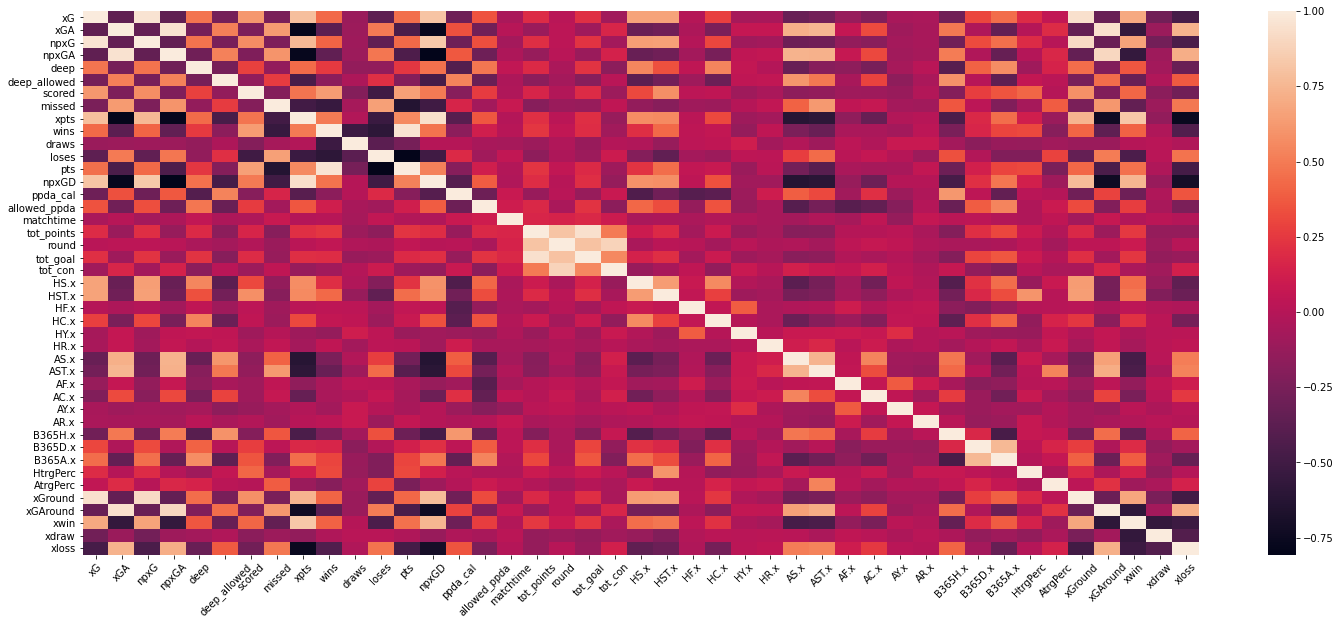

In [13]:
corr = game_ha_win.loc[game_ha_win["h_a"] == "h"].corr()
plt.figure(figsize = (25,10))
chart = sns.heatmap(corr)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

* 승 무승부 패 숫자로 바꾸기

In [14]:
game_data["result"].replace(['w', 'd' , 'l'], [1,0,-1] ,inplace=True)
game_data["result"].head()

0    1
1   -1
2    1
3   -1
4    0
Name: result, dtype: int64

### Modeling

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.svm as svm


In [16]:
clsfrs = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(),
        KNeighborsClassifier(), svm.SVC(kernel = 'linear')]

In [17]:
df = game_data.drop(columns = ['Unnamed: 0', 'deep', 'deep_allowed', "result", "pts", "xpts", "date", "npxGD", "Referee.x" , "matchDay", "tot_points",'teamId',"wins","loses","draws" , 'missed' ])
df_form = game_data.drop(columns = ['Unnamed: 0', 'deep', 'deep_allowed', "result", "pts", "xpts", "date", "npxGD", "Referee.x" , "matchDay", "tot_points", 'teamId', "wins","loses","draws" ,'missed'])

In [18]:
df["h_a"].replace(['h','a'], [1,0] ,inplace=True)
df_form["h_a"].replace(['h','a'], [1,0] ,inplace=True)

df["h_a"], df_form["h_a"]

(0      1
 1      0
 2      0
 3      1
 4      1
       ..
 571    0
 572    0
 573    1
 574    0
 575    1
 Name: h_a, Length: 576, dtype: int64,
 0      1
 1      0
 2      0
 3      1
 4      1
       ..
 571    0
 572    0
 573    1
 574    0
 575    1
 Name: h_a, Length: 576, dtype: int64)

In [19]:
X = df.values
y = game_data["result"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [20]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
for clsfr in clsfrs:
    clsfr.fit(X_train, y_train)
    print(type(clsfr))
    print("train score = ", clsfr.score(X_train, y_train))
    print("score = ", clsfr.score(X_test, y_test), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
train score =  0.7934782608695652
score =  0.7327586206896551 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
train score =  1.0
score =  0.646551724137931 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
train score =  0.9978260869565218
score =  0.7931034482758621 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
train score =  0.6065217391304348
score =  0.43103448275862066 

<class 'sklearn.svm._classes.SVC'>
train score =  0.8108695652173913
score =  0.7068965517241379 



In [22]:
#With scaled variables
for clsfr in clsfrs:
    clsfr.fit(X_train_std, y_train)
    print(type(clsfr))
    print("train score = ", clsfr.score(X_train_std, y_train))
    print("score = ", clsfr.score(X_test_std, y_test), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
train score =  0.8
score =  0.7068965517241379 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
train score =  1.0
score =  0.6637931034482759 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
train score =  0.9956521739130435
score =  0.8017241379310345 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
train score =  0.7043478260869566
score =  0.5517241379310345 

<class 'sklearn.svm._classes.SVC'>
train score =  0.8
score =  0.7155172413793104 



### 랜덤포레스트 Importance

In [24]:
RFC = RandomForestClassifier(n_estimators=500,random_state=42)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

 1) scored                         0.135238
 2) xGA                            0.064174
 3) xG                             0.057230
 4) npxGA                          0.055634
 5) npxG                           0.045482
 6) ppda_cal                       0.035689
 7) allowed_ppda                   0.035416
 8) B365D.x                        0.034670
 9) xwin                           0.033004
10) AtrgPerc                       0.032697
11) xloss                          0.029746
12) HtrgPerc                       0.029322
13) B365A.x                        0.027947
14) B365H.x                        0.027381
15) tot_goal                       0.026538
16) tot_con                        0.026494
17) AF.x                           0.026363
18) xGAround                       0.024930
19) HST.x                          0.023210
20) AC.x                           0.023062
21) HS.x                           0.022529
22) round                          0.022461
23) HF.x                        

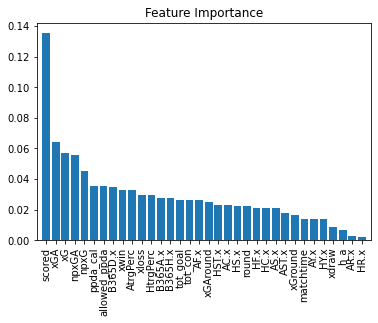

In [26]:
features = df_form.columns
importances = RFC.feature_importances_

indices = np.argsort(importances)[::-1]
indices
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,features[indices[f]], importances[indices[f]]))
    
plt.title('Feature Importance') 
plt.bar(range(X_train.shape[1]), importances[indices], align='center') 
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90) 
plt.xlim([-1, X_train.shape[1]]) 
plt.show()

### 순차 특성 선택 알고리즘
* Sequential Backward Selection (SBS) - 순차 후진 선택

In [29]:
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
knn = KNeighborsClassifier()

clf_labels = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'KNN']

all_clf = [lr, rf, gb, knn]

for label, clf in zip(clf_labels, all_clf):
    print(label, clf)

Logistic Regression LogisticRegression()
Random Forest RandomForestClassifier()
Gradient Boosting GradientBoostingClassifier()
KNN KNeighborsClassifier()


In [47]:
k_feat = {key: None for key in clf_labels}
sbs = {key: None for key in clf_labels}

sbs

{'Logistic Regression': None,
 'Random Forest': None,
 'Gradient Boosting': None,
 'KNN': None}

In [48]:
from sklearn.base import clone 
from itertools import combinations 
import numpy as np 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 

class SBS(): 
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.2, random_state=1): 
        self.scoring = scoring 
        self.estimator = clone(estimator) 
        self.k_features = k_features 
        self.test_size = test_size 
        self.random_state = random_state 
        
    def fit(self, X, y): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        
        dim = X_train.shape[1] 
        self.indices_ = tuple(range(dim)) 
        self.subsets_ = [self.indices_] 
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_) 
        self.scores_ = [score] 
        
        while dim > self.k_features: 
            scores = [] 
            subsets = []
            
            for p in combinations(self.indices_, r= dim - 1): 
                score = self._calc_score(X_train, y_train, X_test, y_test, p) 
                scores.append(score) 
                subsets.append(p) 
            best = np.argmax(scores) 
            self.indices_ = subsets[best] 
            self.subsets_.append(self.indices_) 
            dim -= 1 
            self.scores_.append(scores[best]) 
            self.k_score_ = self.scores_[-1] 
            return self 
        
    def transform(self, X): 
        return X[:, self.indices_] 
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices): 
        self.estimator.fit(X_train[:, indices], y_train) 
        y_pred = self.estimator.predict(X_test[:, indices]) 
        score = self.scoring(y_test, y_pred) 
        return score


    

In [36]:
k_feat = {key: None for key in clf_labels}
sbs = {key: None for key in clf_labels}

sbs

{'Logistic Regression': None,
 'Random Forest': None,
 'Gradient Boosting': None,
 'KNN': None}

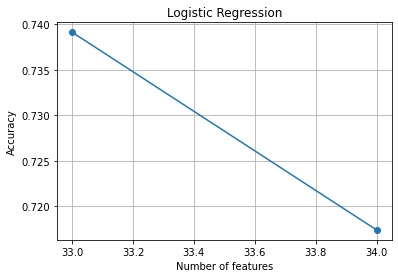

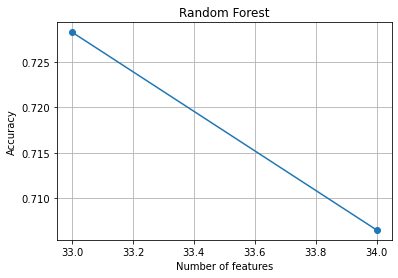

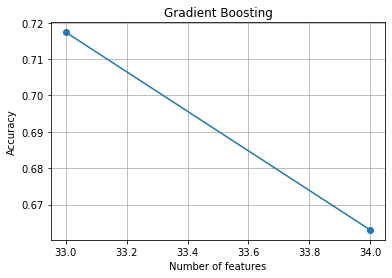

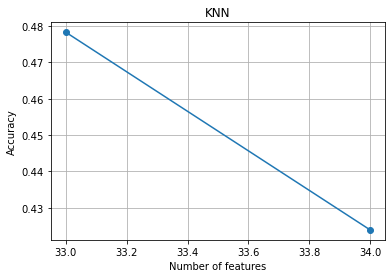

In [49]:
import matplotlib.pyplot as plt

for label, clf in zip(clf_labels, all_clf):
    sbs[label] = SBS(clf,k_features=1)
    sbs[label].fit(X_train,y_train)
    k_feat[label] = [len(k) for k in sbs[label].subsets_]
    plt.plot(k_feat[label], sbs[label].scores_, marker='o')
    #plt.ylim([0.3, 1.02])
    plt.title(label)
    plt.ylabel('Accuracy')
    plt.xlabel('Number of features')
    plt.grid()
    plt.show()

### 앙상블 모델

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

for label, clf in zip(clf_labels, all_clf):
    scores = cross_val_score(estimator=clf, X = X_train, y = y_train, cv = 10, scoring = 'accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.72 (+/- 0.06) [Logistic Regression]
Accuracy: 0.73 (+/- 0.06) [Random Forest]
Accuracy: 0.78 (+/- 0.03) [Gradient Boosting]
Accuracy: 0.45 (+/- 0.07) [KNN]


In [43]:
#Ensemble model:
eclf = VotingClassifier(estimators=[('lr',lr), ('rf',rf), ('gb',gb), ('knn',knn)], voting='hard')

scores = cross_val_score(estimator=eclf, X=X_train, y = y_train, cv= 10, scoring = 'accuracy')

print("Accuracy: %0.2f (+/- %0.2f)"  % (scores.mean(), scores.std()))

Accuracy: 0.75 (+/- 0.05)


In [44]:
eclf.fit(X_train,y_train)

y_pred_eclf = eclf.predict(X_test)

print("Accuracy score = ", accuracy_score(y_pred_eclf,y_test))

Accuracy score =  0.75
